# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
base = pd.read_csv("/content/drive/MyDrive/SINASC_RO_2019.csv")
base.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
base.loc[base['APGAR5'] >=8, 'APGAR5_CAT'] = 'normal'
base.loc[(base['APGAR5'] <= 7) & (base['APGAR5'] >= 6), 'APGAR5_CAT'] = 'asfixia leve'
base.loc[(base['APGAR5'] <= 5) & (base['APGAR5'] >= 4), 'APGAR5_CAT'] = 'asfixia moderada'
base.loc[base['APGAR5'] <=3, 'APGAR5_CAT'] = 'asfixia grave'

base['APGAR5_CAT'].unique()

array(['normal', 'asfixia leve', 'asfixia grave', 'asfixia moderada', nan],
      dtype=object)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='APGAR5', ylabel='count'>

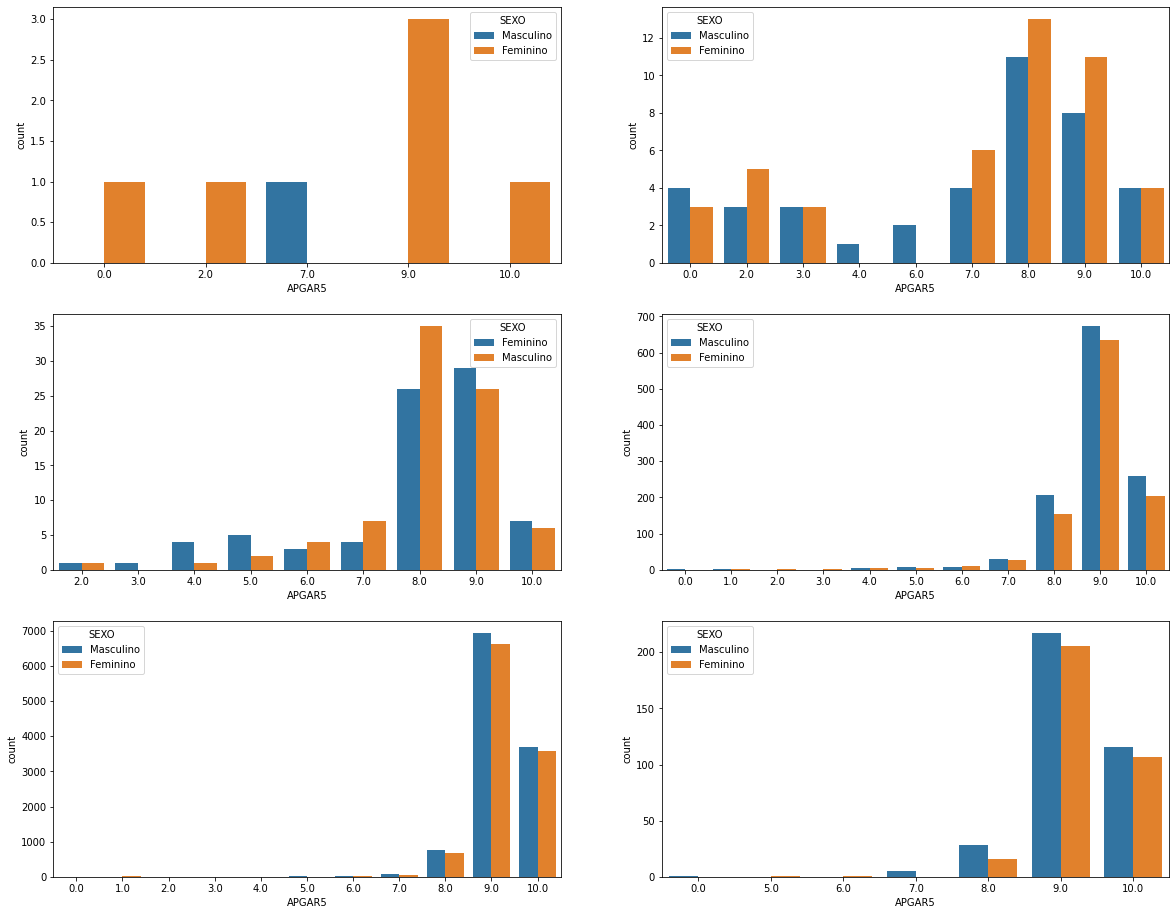

In [5]:
plt.rc('figure', figsize=(20, 16))
fig, axes = plt.subplots(3, 2)

sns.countplot(ax = axes[0, 0], x='APGAR5', hue='SEXO', data=base[base['GESTACAO'] == 'Menos de 22 semanas'])
sns.countplot(ax = axes[0, 1], x='APGAR5', hue='SEXO', data=base[base['GESTACAO'] == '22 a 27 semanas'])
sns.countplot(ax = axes[1, 0], x='APGAR5', hue='SEXO', data=base[base['GESTACAO'] == '28 a 31 semanas'])
sns.countplot(ax = axes[1, 1], x='APGAR5', hue='SEXO', data=base[base['GESTACAO'] == '32 a 36 semanas'])
sns.countplot(ax = axes[2, 0], x='APGAR5', hue='SEXO', data=base[base['GESTACAO'] == '37 a 41 semanas'])
sns.countplot(ax = axes[2, 1], x='APGAR5', hue='SEXO', data=base[base['GESTACAO'] == '42 semanas e mais'])            
              

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
base_cross = pd.crosstab(base['GESTACAO'], base['APGAR5'])
base_cross

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [9]:
base_cross_per = base_cross.div(base_cross.sum(axis=1), axis=0)
base_cross_per

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

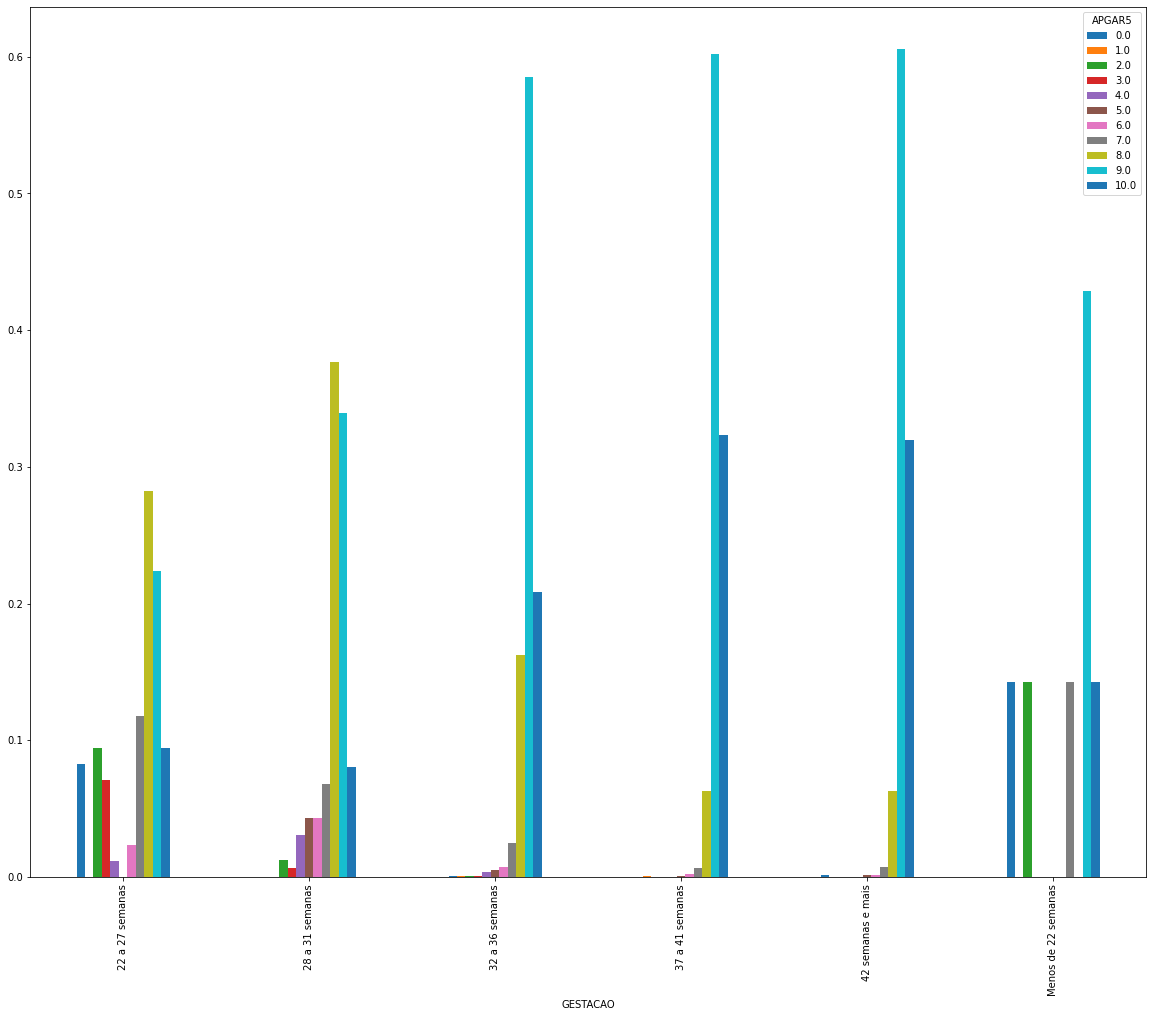

In [11]:
base_cross_per.plot.bar()

A classificação é justificável, tendo como parâmetro o APGAR5. Observa-se que, a partir do gráfico acima, há muito maior ocorrência de prejuízo à saúde do bebê até as 36 de gestação quando comparada à faixa de tempo de gestação superior

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

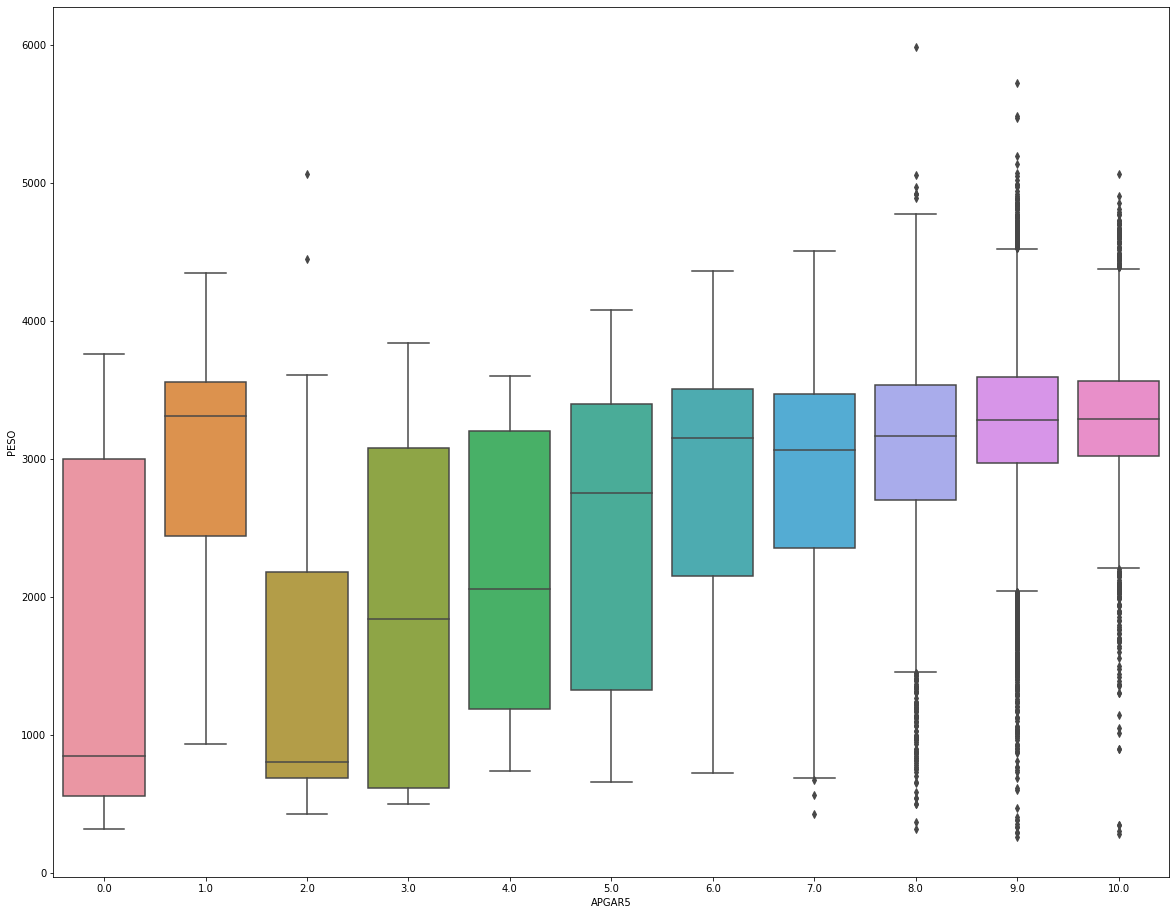

In [12]:
sns.boxplot(x='APGAR5', y='PESO', data=base)

<Axes: xlabel='APGAR5_CAT', ylabel='PESO'>

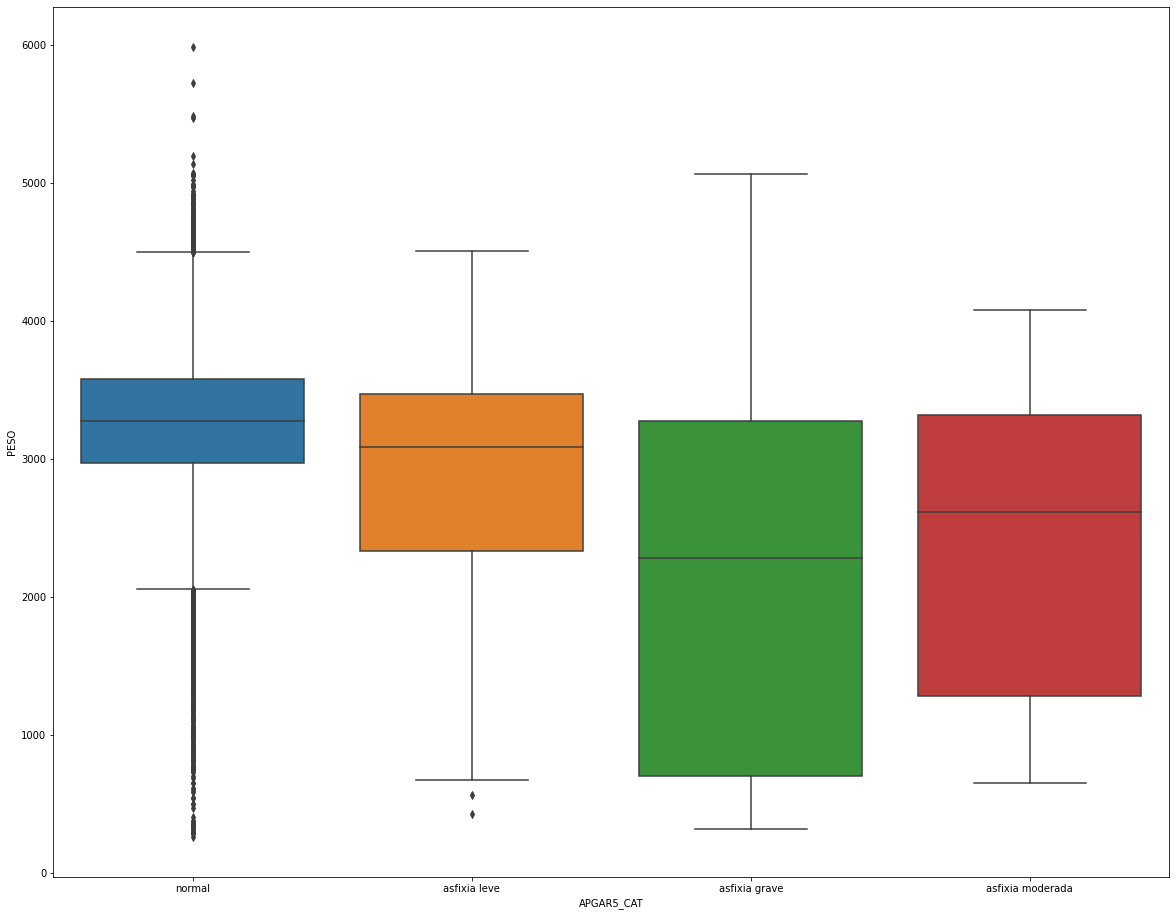

In [15]:
sns.boxplot(x='APGAR5_CAT', y='PESO', data=base)

As partir dos gráficos acima, é possível inferir existência de correlação entre APGAR5 e o peso do bebê, principalmente ao se observar a curva acendente da mediana do peso em proporção ao APGAR5